In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r'C:\Users\KAREN J FERNANDES\anaconda3\Files\Machine Learning\Logistic Regression\HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
df.shape

(14999, 10)

In [5]:
employees_left = df[df['left']==1]
employees_left.shape

(3571, 10)

In [6]:
employees_retained = df[df['left']==0]
employees_retained.shape

(11428, 10)

In [7]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


- Satisfaction level: Employees who are retained seem to be very satisfied (0.44) than those who are retained (0.66)
- Number Project: There is a slight difference in the number of projects given to those who left and the number here is slightly higher than those retained.
- Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)
- Promotion: Those leaving the company seem not to be getting promoted more than those retained in the past 5 years.

### Data Visualization

### Impact of Employee Salaries on Retention

In [8]:
left_count = df.groupby(['salary', 'left']).size().reset_index(name='count')
left_count.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


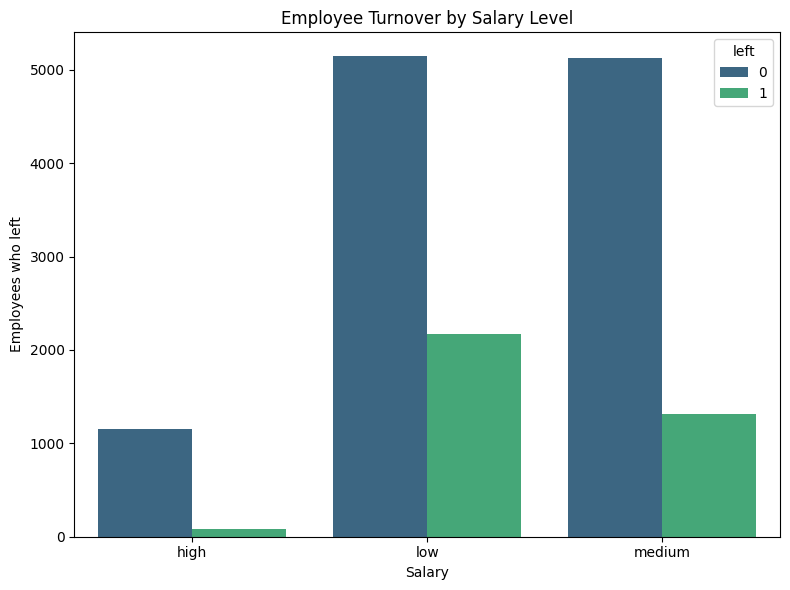

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='count', hue='left', data=left_count, palette='viridis', errorbar=None)
plt.xlabel('Salary')
plt.ylabel('Employees who left')
plt.title('Employee Turnover by Salary Level')
plt.tight_layout()
plt.show()

Those with high salary are likely going to stay compared to medium and low salary.

### Corelation between Department and Employee Retention

In [10]:
left_per_dept = df.groupby(['department', 'left']).size().reset_index(name='count')
left_per_dept.head()

,department,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


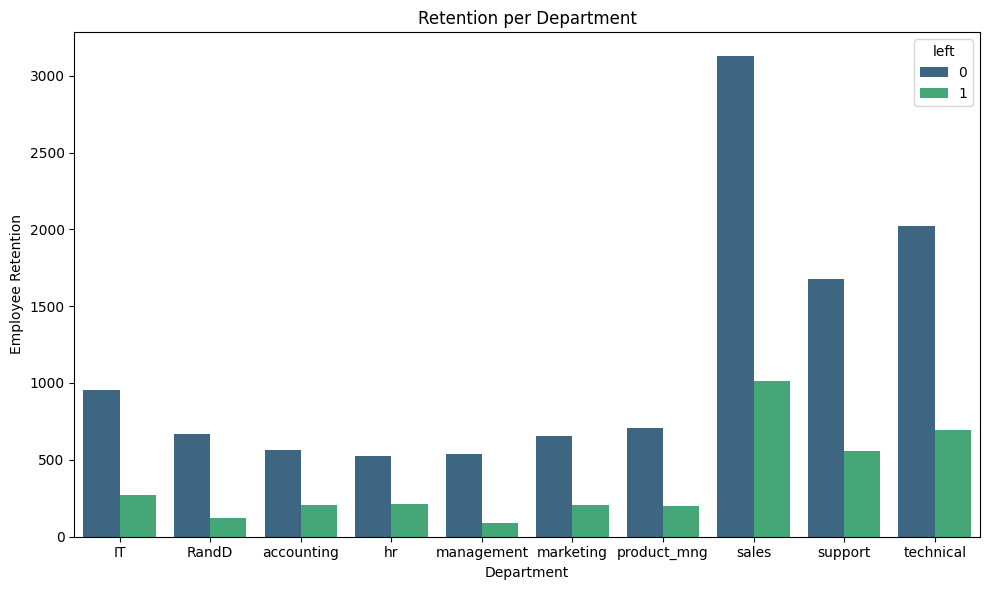

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='department', y='count', data=left_per_dept, hue='left', palette='viridis', errorbar=None)
plt.xlabel('Department')
plt.ylabel('Employee Retention')
plt.title('Retention per Department')
plt.tight_layout()
plt.show()

### Logistic Model

Independent varliables that we can use for further analysis
- Satisfaction Level
- Average Monthly Hours
- Promotion last 5 years
- Salary

In [12]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


To analyze the salary data, we need to convert the string values in the salary column to numerical values using one-hot encoding.

In [13]:
salary_dummies = pd.get_dummies(df1.salary, prefix='salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [14]:
salary_dummies = salary_dummies.astype(int)
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [15]:
df_with_dummies = pd.concat([df1, salary_dummies], axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [16]:
df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [17]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [18]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
8915,0.56,237,0,0,1,0
5795,0.15,207,0,0,0,1
13455,0.82,164,0,1,0,0
2917,0.74,106,0,0,0,1
4303,0.50,165,0,0,1,0
...,...,...,...,...,...,...
13745,0.64,139,0,0,1,0
8415,0.74,131,0,0,0,1
6080,0.31,97,0,0,1,0
10634,0.56,230,0,1,0,0


In [21]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11008,0.92,176,0,0,0,1
2457,0.65,149,0,0,1,0
2836,0.54,250,0,0,0,1
14415,0.87,254,0,0,1,0
859,0.10,270,0,0,1,0
...,...,...,...,...,...,...
14297,0.17,232,0,0,1,0
7894,0.70,182,0,0,1,0
13871,0.52,208,0,0,1,0
9319,0.89,260,0,0,1,0


In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy of the model

In [26]:
model.score(X_test, y_test)

0.7793333333333333